# 과대적합과 과소적합
***

### 과대적합 : 학습 데이터에만 모델이 과도하게 fitting되는것. 

### 과소적합 : 예측 성능이 향상될 수 있는데 학습이 종료되는 경우. 모델이 단순하거나 규제가 많거나 학습이 짧거나 등등

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
num_words = 1000

In [5]:
(tr_data, tr_cls), (te_data, te_cls) = imdb.load_data(num_words = num_words)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results

#### 멀티-핫 인코딩을 한다. 멀티-핫 인코딩은 정수 시퀀스를 0, 1 벡터로 변환한다.

In [7]:
tr_data = multi_hot_sequences(tr_data, dimension = num_words)
te_data = multi_hot_sequences(te_data, dimension = num_words)

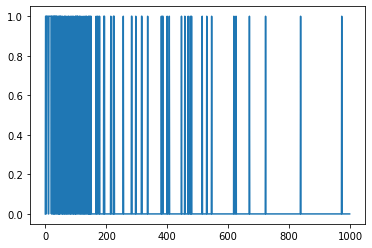

In [11]:
plt.plot(tr_data[0])
plt.show()

#### 컬러로 매핑된 부분은 단어가 존재하는 것이다.


#### 과대적합을 막는 가장 심플한 방법은 모델의 규모를 축소하는 것이다. 규모가 축소되면 학습해야할 파라미터의 수가 줄어드는데 이 파라미터 수를 모델의 '용량'이라고 한다.

#### 즉 많은 파라미터를 가진 모델은 더 많은 '기억 용량'을 가진다. 하지만 일반화 능력이 떨어져 새로운 데이터를 예측할 때는 성능이 안좋은 것이 일반적이다.

### 기억하자. 모델의 목표는 **일반화**이다.



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
baseline_model = Sequential([
    Dense(16, activation='relu', input_shape=(num_words,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['acc'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = baseline_model.fit(tr_data,
                                      tr_cls,
                                      epochs = 20,
                                      batch_size = 512,
                                      validation_data = (te_data, te_cls))

In [23]:
smaller_model = Sequential([
    Dense(4, activation='relu', input_shape=(num_words,)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['acc'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(tr_data,
                                    tr_cls,
                                    epochs = 20,
                                    batch_size = 512,
                                    validation_data = (te_data, te_cls))

In [25]:
bigger_model = Sequential([
    Dense(512, activation='relu', input_shape=(num_words,)),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['acc'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [26]:
bigger_history = bigger_model.fit(tr_data, tr_cls,
                                  epochs = 20,
                                  batch_size = 512,
                                  validation_data = (te_data, te_cls))

#### baseline, smaller, bigger 3가지 모델을 만들었다. 3가지 모델의 각 history로 loss와 acc를 확인해보자.

In [29]:
def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

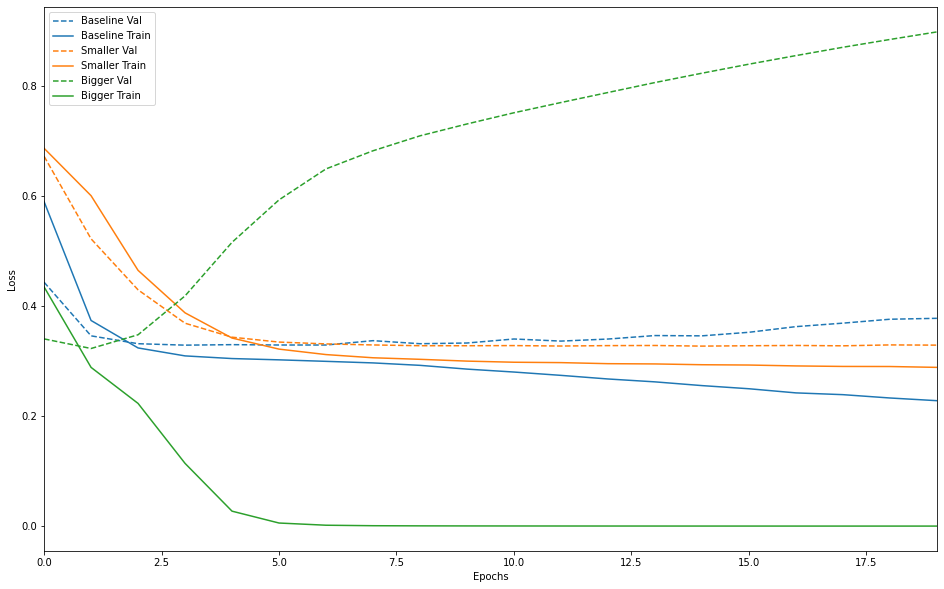

In [30]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

#### smaller 모델이 가장 늦게 과대적합이 시작되었고 bigger가 가장 빨리 과대적합이 시작되었다.

#### "간단한 모델"은 모델 파라미터의 분포를 봤을 때 엔트로피가 작은 모델이다. 따라서 과대적합을 막는 일반적인 방법은 네트워크의 복잡도에 제약을 가하는 것이다. 이는 가중치 값의 분포를 좀 더 균일하게 만들어주는데 이를 '가중치 규제'라고 한다.

- L1 규제는 가중치 절댓값에 비례하는 비용이 추가된다.

- L2 규제는 가중치의 제곱에 비례하는 비용이 추가된다. 

L1 규제는 일부 가중치를 0으로 만들고 L2 규제는 가중치 파라미터를 제한하지만 완전한 0으로 만들지는 않는다.

In [33]:
from tensorflow.keras.regularizers import l2

In [34]:
l2_model = Sequential([
    Dense(16, kernel_regularizer = l2(0.001),
                       activation = 'relu', input_shape = (num_words, )),
    Dense(16, kernel_regularizer = l2(0.001),
                       activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [35]:
l2_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['acc'])

In [ ]:
l2_model_history = l2_model.fit(tr_data, tr_cls,
                                epochs = 20,
                                batch_size = 512,
                                validation_data = (te_data, te_cls))

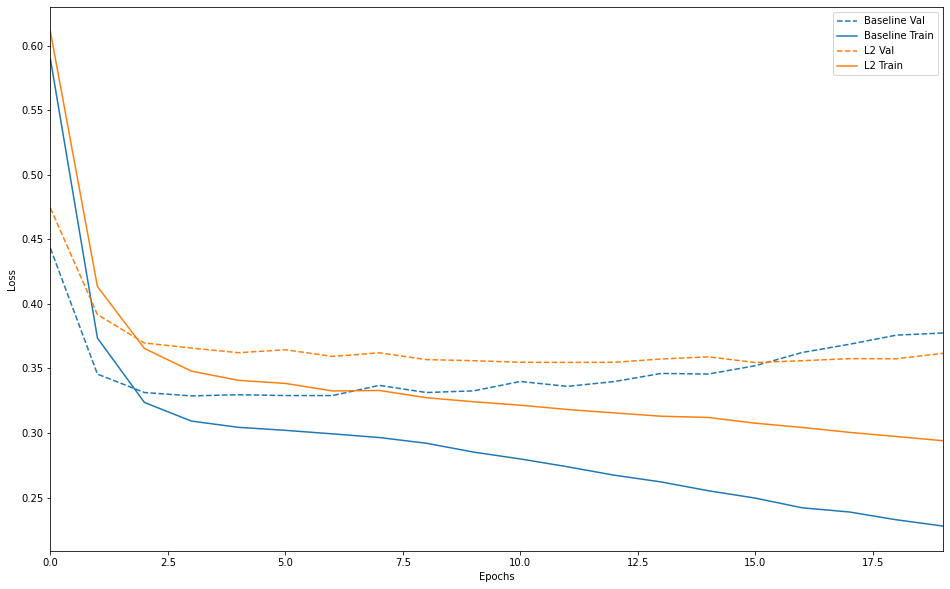

In [37]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

#### L2 규제를 적용한 모델이 기본 모델 보다 과대적합에 훨씬 더 잘 견디고 있다.

#### 드롭아웃은 신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나이다. 드롭아웃을 층에 적용하면 훈련하는 동안 층의 출력 특성을 랜덤하게 0으로 만든다.

In [38]:
from tensorflow.keras.layers import Dropout

In [40]:
dpt_model = Sequential([
    Dense(16, activation='relu', input_shape = (num_words,)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [41]:
dpt_model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])


In [42]:
dpt_model_history = dpt_model.fit(tr_data, tr_cls,
                                  epochs = 20,
                                  batch_size = 512,
                                  validation_data = (te_data, te_cls))

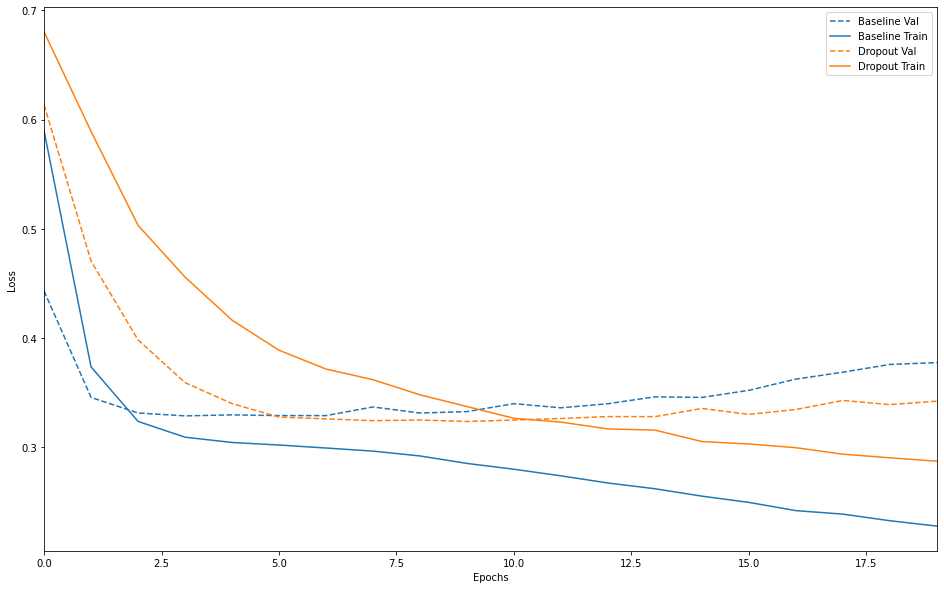

In [43]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

#### 드롭아웃을 적용하니 기준 모델 보다 향상된 것을 알 수 있다.